In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient
connection = MongoClient()

db = connection.movie_dataset
crew = db.crew

# Trova i costumisti e quanti sono

In [2]:
costume_crew = pd.DataFrame(crew.find({"department": "Costume & Make-Up"}))
costume_crew

,_id,credit_id,department,person_id,movie_id
0,5f5108e1e1677cf95d16d0fa,52fe4292c3a36847f80291bb,Costume & Make-Up,8527.0,949.0
1,5f5108e1e1677cf95d16d103,564717adc3a3682611002c07,Costume & Make-Up,1535950.0,949.0
2,5f5108e1e1677cf95d16d10a,564717949251413e7f002a36,Costume & Make-Up,1535949.0,949.0
3,5f5108e1e1677cf95d16d10b,564717f19251413adb002c49,Costume & Make-Up,8870.0,949.0
4,5f5108e1e1677cf95d16d10c,5647180a9251413adb002c52,Costume & Make-Up,16551.0,949.0
...,...,...,...,...,...
30845,5f51116be1677cf95d266ddb,56ff7440c3a3686e9e0014cd,Costume & Make-Up,1599742.0,390959.0
30846,5f51116be1677cf95d266ddc,56ff745a925141677d001538,Costume & Make-Up,1599742.0,390959.0
30847,5f51116be1677cf95d266de6,5823404cc3a368330b00cb6e,Costume & Make-Up,5493.0,390959.0
30848,5f51116be1677cf95d266dfe,5894ae1992514142800081fc,Costume & Make-Up,1749861.0,439050.0


In [3]:
costume_crew['person_id'].nunique()

12434

# Trova l'ID del genere 'History'

In [4]:
genres = db.genres
pd.DataFrame(genres.find({"name": "History"}))

,_id,name
0,36,History


# Recupera gli ID dei migliori film di genere storico

In [14]:
metadata = db.metadata
metadata_dataframe = pd.DataFrame(metadata.find({'genres': 36})).astype({'_id': 'int32'})
metadata_dataframe = metadata_dataframe[metadata_dataframe['vote_count'] >= 10]
metadata_dataframe = metadata_dataframe.sort_values('vote_average', ascending=False)
metadata_dataframe

ValueError: invalid literal for int() with base 10: '1997-08-20'

In [6]:
id_list = metadata_dataframe['_id']
id_list

269      31217
307      34528
309      34530
302        803
1152    215740
         ...  
462      19495
794       2911
526      14977
1035    128767
507      34867
Name: _id, Length: 823, dtype: int32

# Trova i costumisti che hanno partecipato a più film storici

In [7]:
best_costume_crew = costume_crew[costume_crew['movie_id'].isin(id_list)]
costume_count = best_costume_crew.groupby('person_id').count().sort_values('movie_id', ascending=False)
costume_count = costume_count['_id']
costume_count

person_id
26175.0      6
9247.0       6
4061.0       5
461.0        4
17166.0      4
            ..
1303052.0    1
1304201.0    1
1304298.0    1
1304433.0    1
1890086.0    1
Name: _id, Length: 1234, dtype: int64

# Grafico con valutazioni dei film (Y) per i 10 più prolifici costumisti (X)

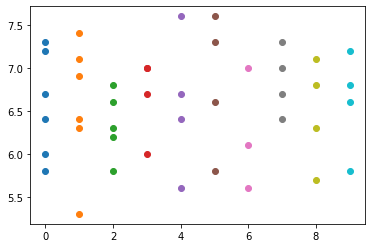

In [8]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(10):
    person = costume_count.index[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.show()

# Voti (Y) di tutti i film dei costumisti (X) che hanno partecipato ai 20 migliori e peggiori film

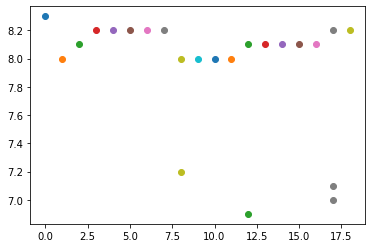

In [9]:
best_hfilms = metadata_dataframe.head(20)
best_hcostume = costume_crew[costume_crew['movie_id'].isin(best_hfilms['_id'])]
best_hcostume_count = best_hcostume['person_id'].astype('int32')

for i in range(best_hcostume_count.shape[0]):
    person = best_hcostume_count.iloc[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.show()

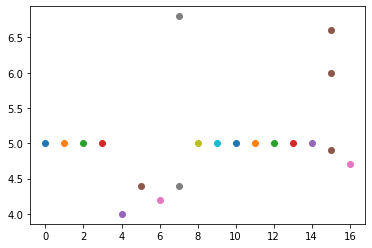

In [10]:
worst_hfilms = metadata_dataframe.tail(20)
worst_hcostume = costume_crew[costume_crew['movie_id'].isin(worst_hfilms['_id'])]
worst_hcostume_count = worst_hcostume['person_id'].astype('int32')

for i in range(worst_hcostume_count.shape[0]):
    person = worst_hcostume_count.iloc[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.show()

# Come prima, ma considerando solo i costumisti che hanno partecipato ad almeno 3 film

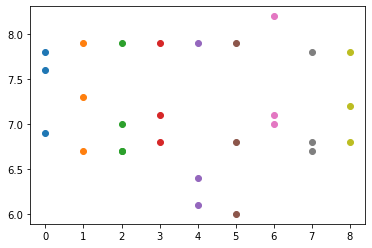

In [11]:
best_hfilms = metadata_dataframe.head(50)
many_films_crew = costume_crew[costume_crew['person_id'].isin(costume_count[costume_count >= 3].index)]
best_hcostume = many_films_crew[many_films_crew['movie_id'].isin(best_hfilms['_id'])]
best_hcostume_count = best_hcostume['person_id'].astype('int32')

for i in range(best_hcostume_count.shape[0]):
    person = best_hcostume_count.iloc[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.show()

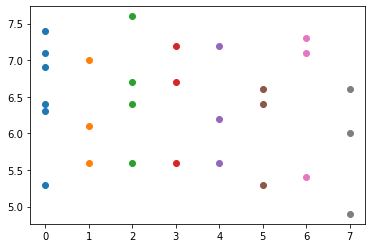

In [12]:
worst_hfilms = metadata_dataframe.tail(55)
worst_hcostume = many_films_crew[many_films_crew['movie_id'].isin(worst_hfilms['_id'])]
worst_hcostume_count = worst_hcostume['person_id'].astype('int32')

for i in range(worst_hcostume_count.shape[0]):
    person = worst_hcostume_count.iloc[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.show()

In [13]:
connection.close()